In [114]:
import numpy as np
import pandas as pd
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings

In [115]:
warnings.filterwarnings("ignore")

In [116]:
data = pd.read_csv("Mall_Customers.csv")

In [117]:
X = data.rename(columns={'Annual Income (k$)':'Annual Income',
                     'Spending Score (1-100)':'Spending Score'})

In [118]:
X.drop('CustomerID',axis=1,inplace=True)

In [119]:
X.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [120]:
X.shape

(200, 4)

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [122]:
X.duplicated().sum()

0

In [123]:
X.isna().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

                                             |          | [  0%]   00:00 -> (? left)


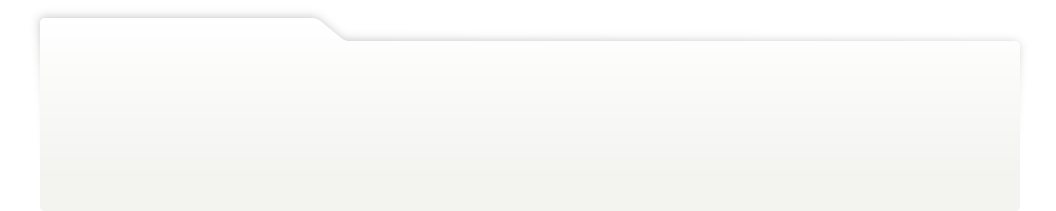
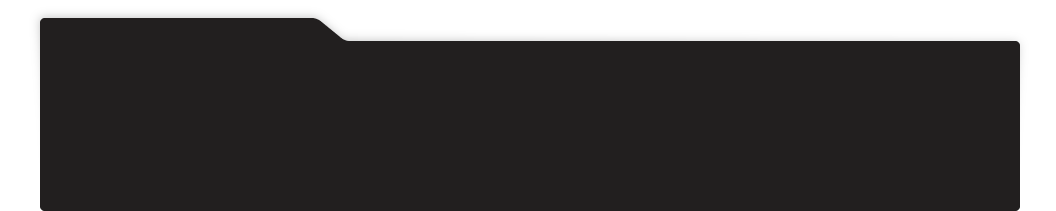
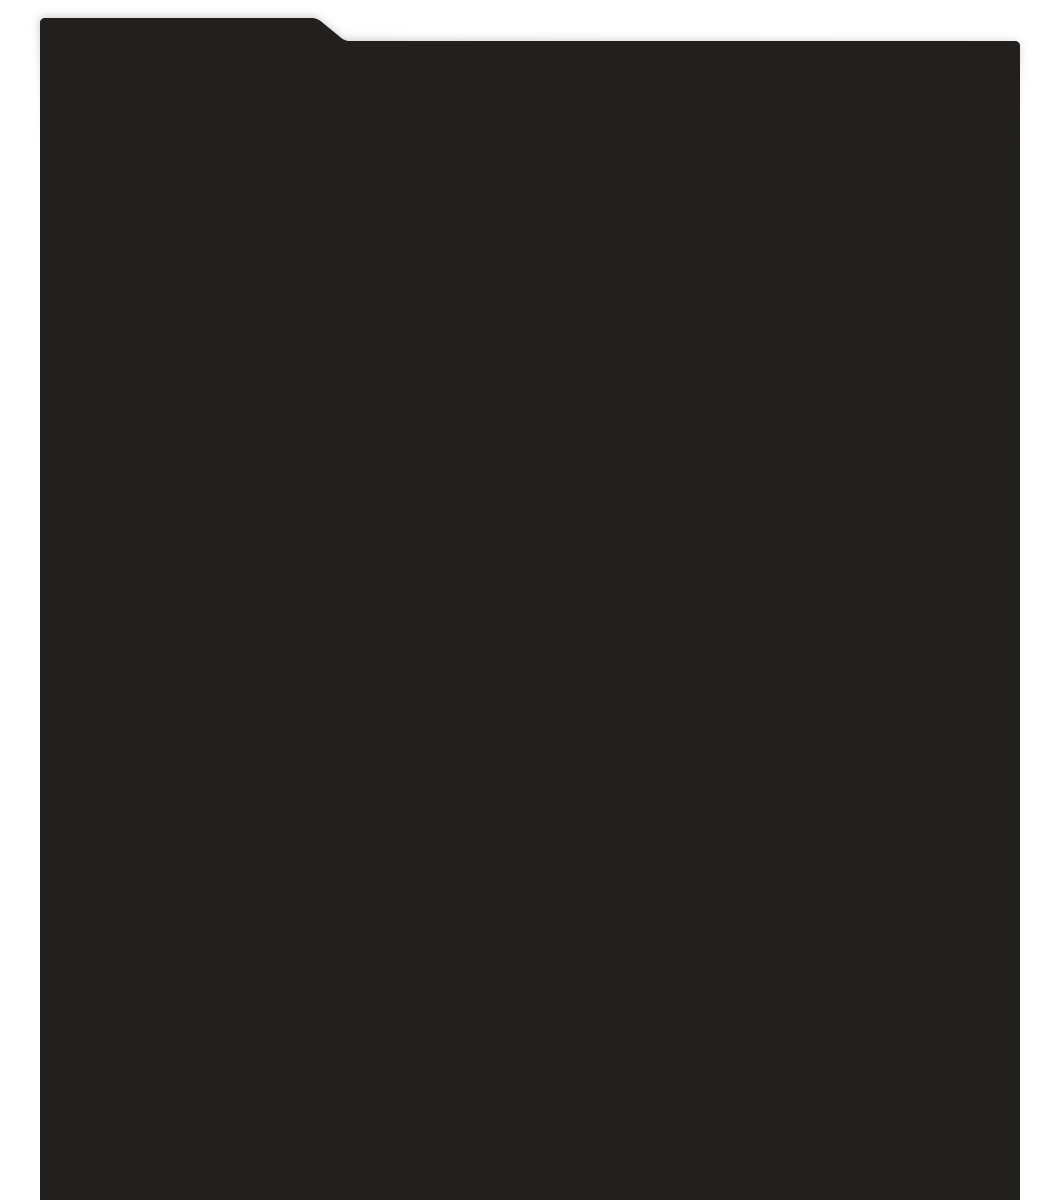
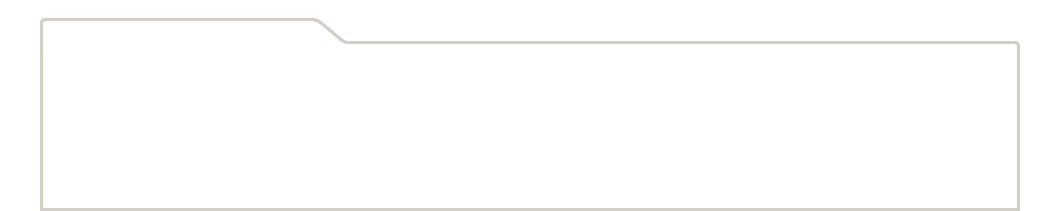
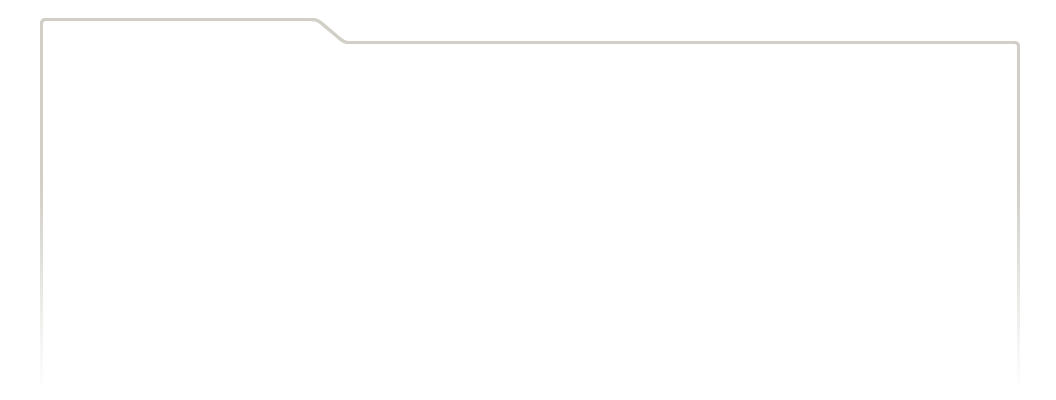
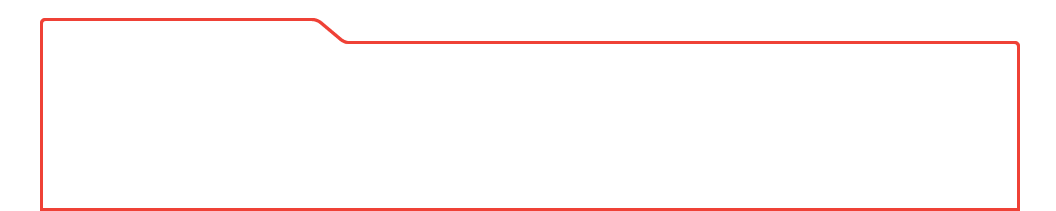
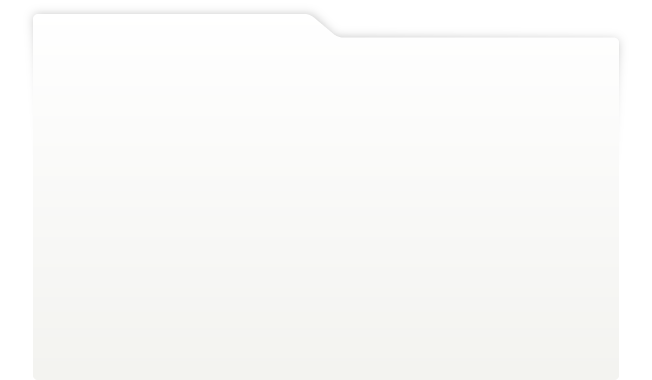
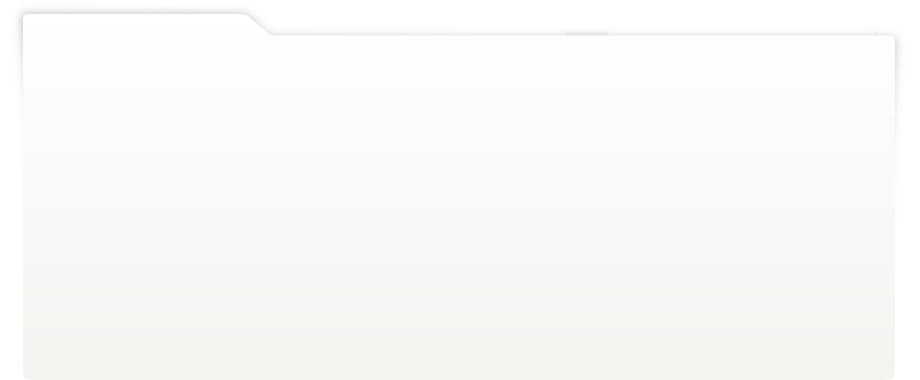
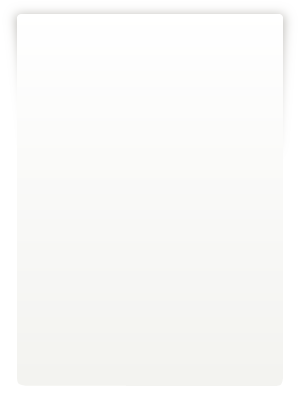
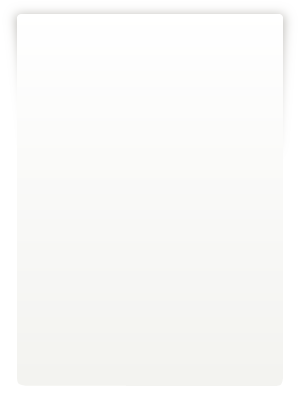
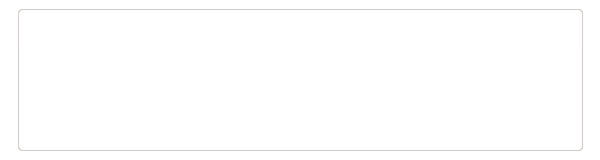
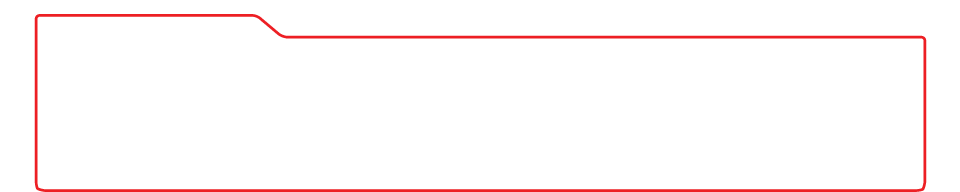
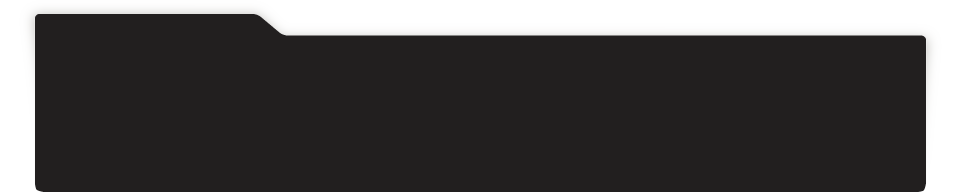
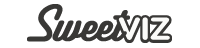
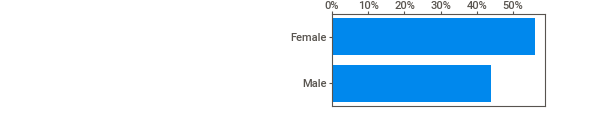
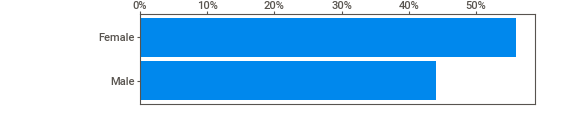
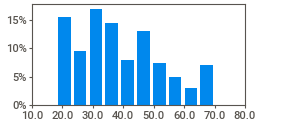
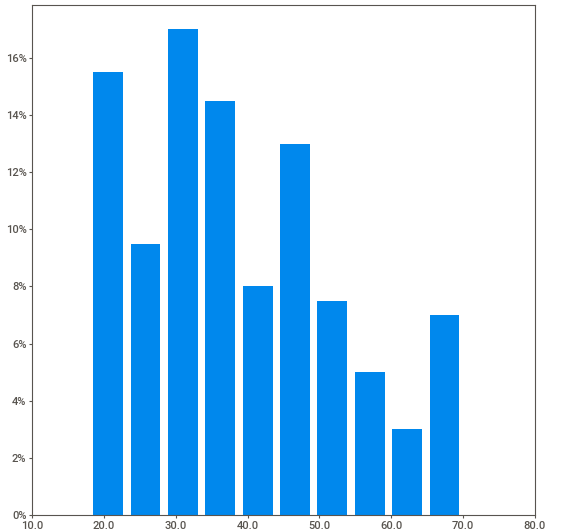
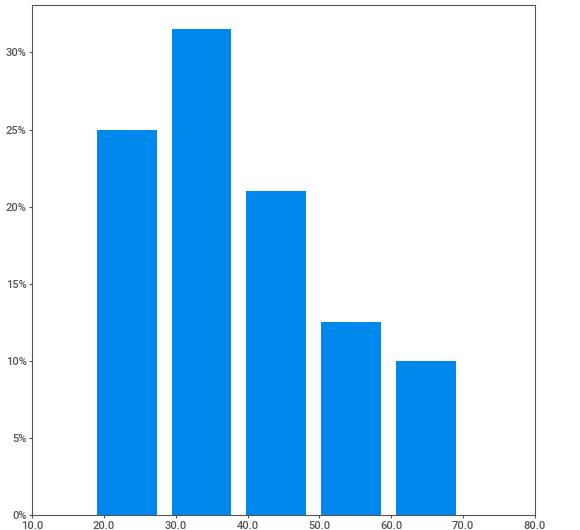
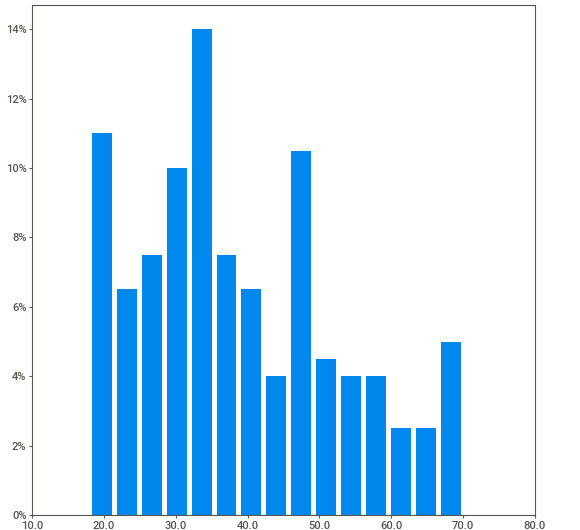
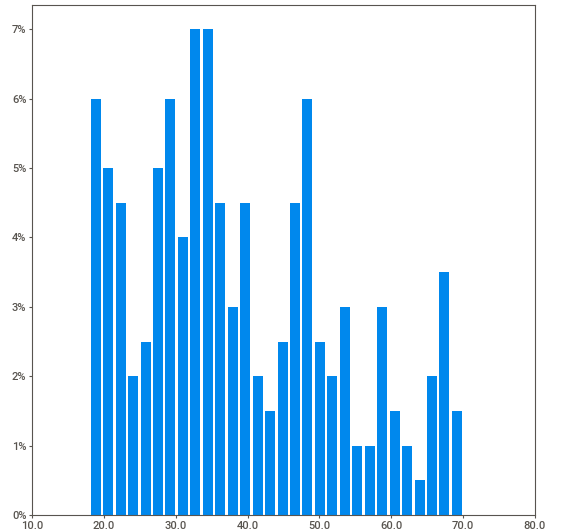
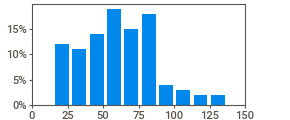
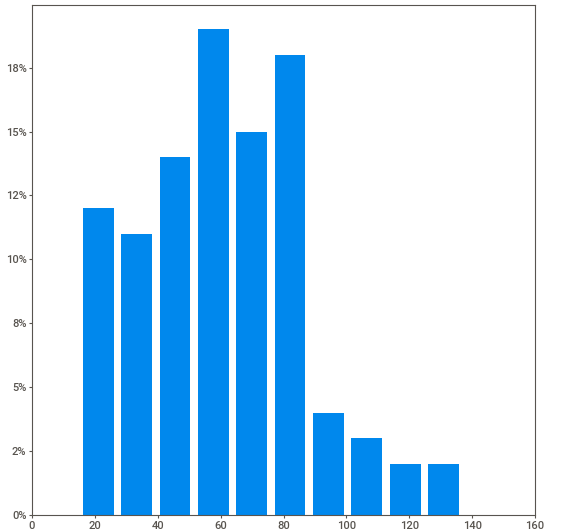
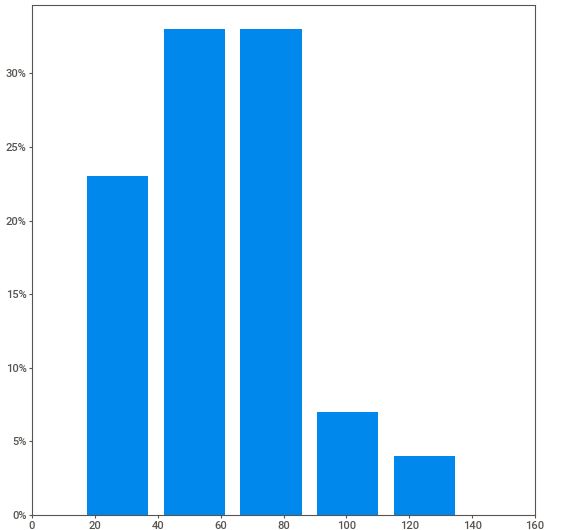
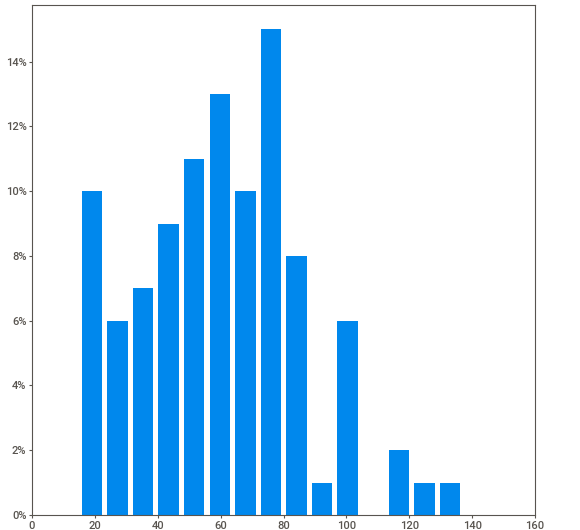
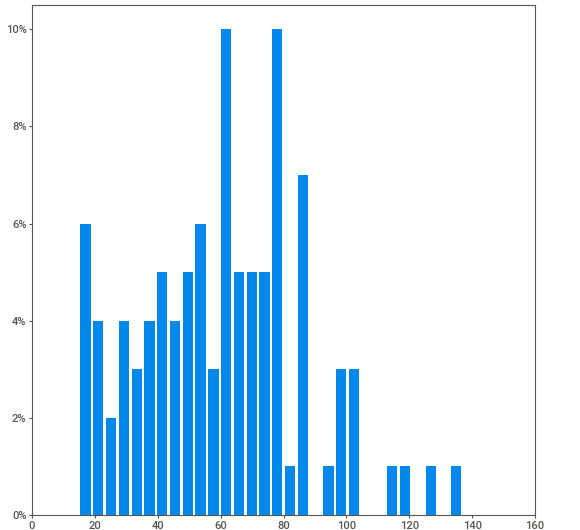
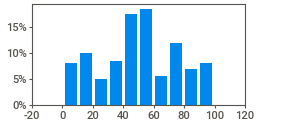
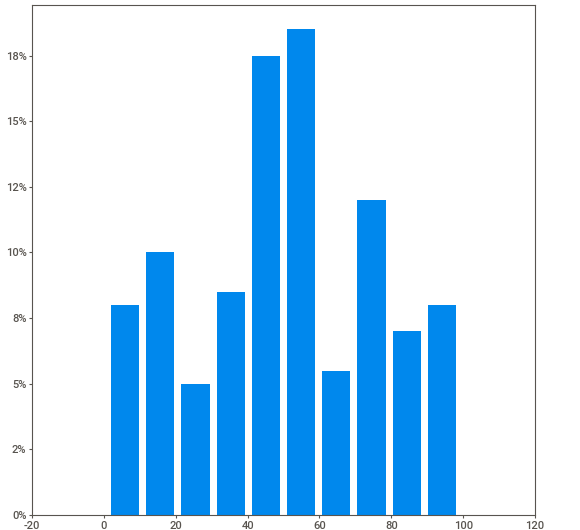
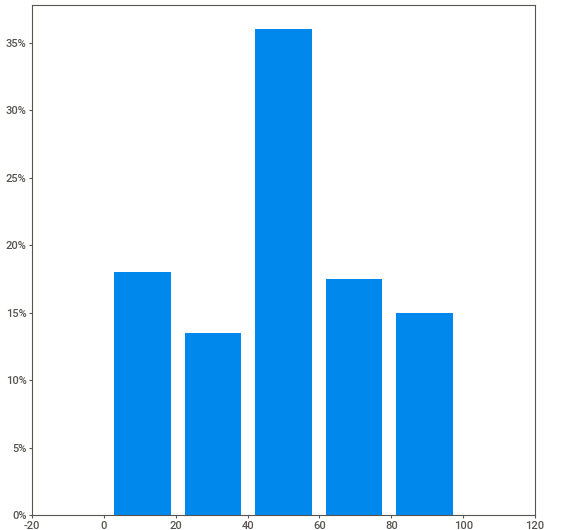
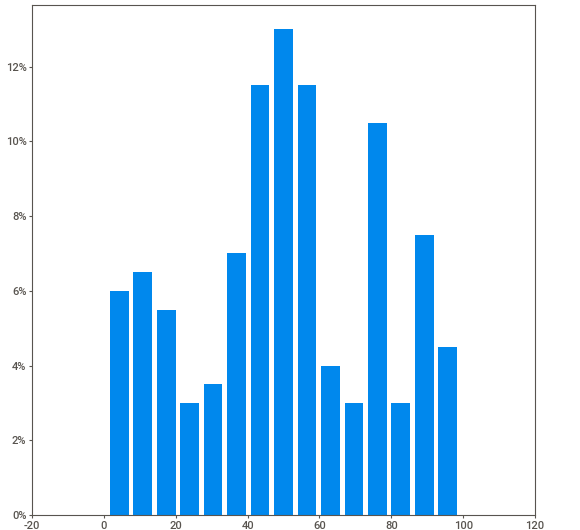
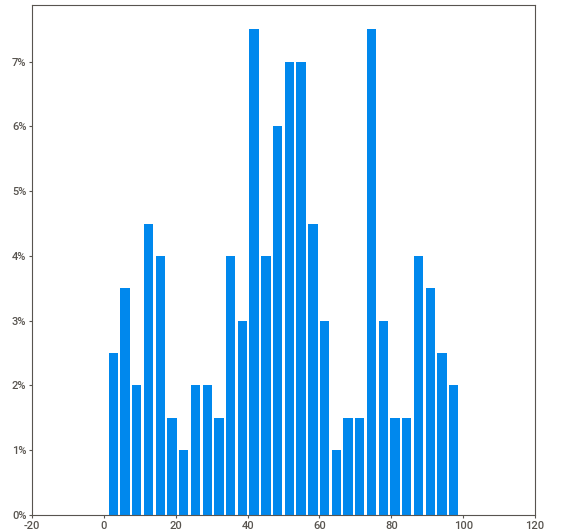
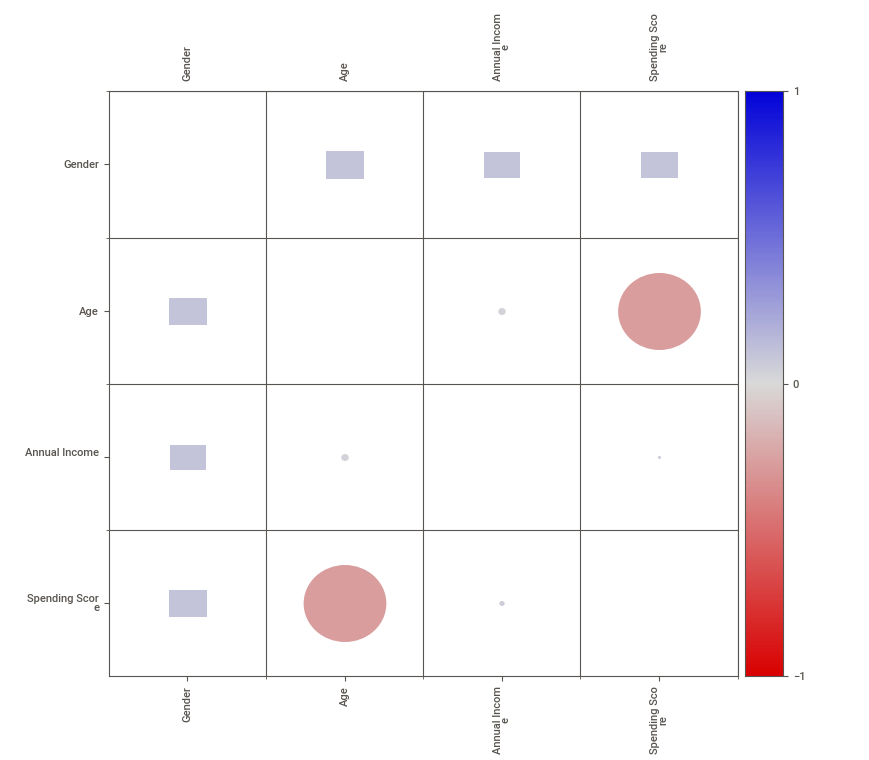
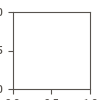

In [124]:
report = sv.analyze(X)
report.show_notebook()

In [125]:
encoder = LabelEncoder()
X['Gender'] = encoder.fit_transform(X['Gender'])
X.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


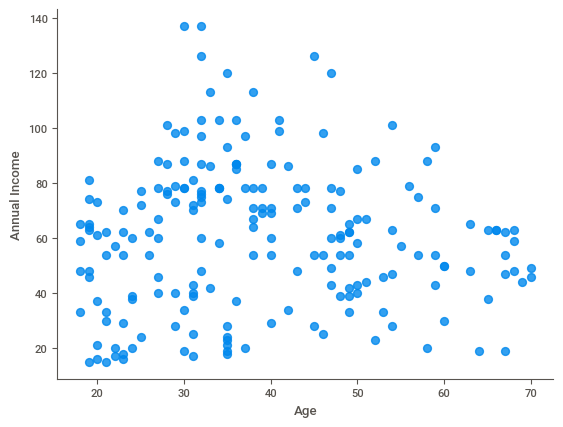

In [126]:
X.plot(kind='scatter', x='Age', y='Annual Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

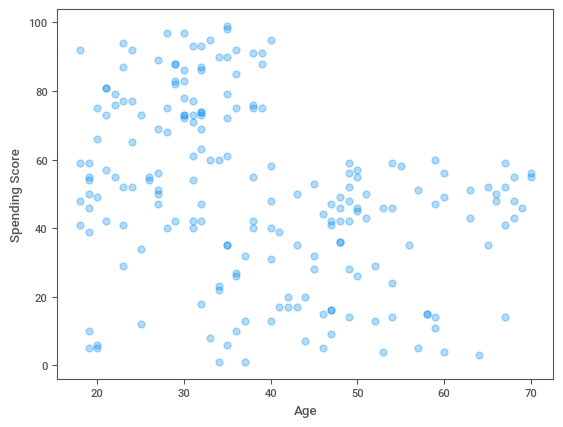

In [127]:
X.plot(kind='scatter', x='Age', y='Spending Score', s=25, alpha=.3)
plt.show()

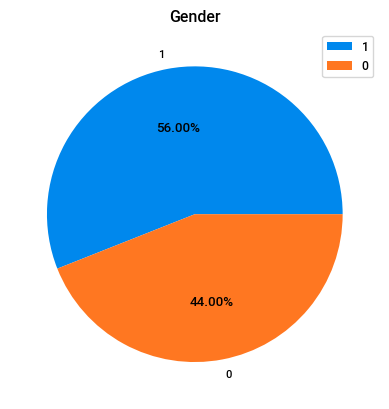

In [128]:
plt.pie(x = X['Gender'].value_counts(), labels = X['Gender'].unique(), autopct = '%1.2f%%');plt.title('Gender')
plt.legend()

<Axes: >

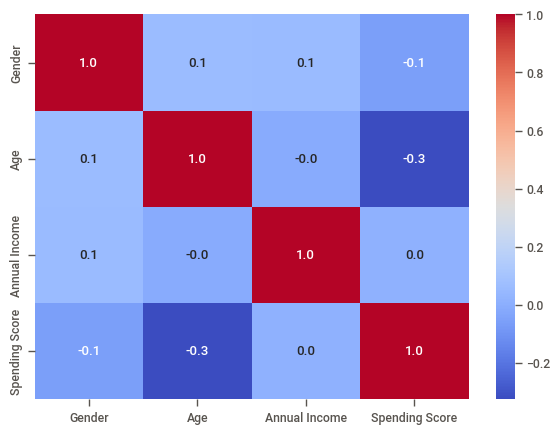

In [129]:
plt.figure(figsize=(7,5))
sns.set_context('paper',font_scale=1)
sns.heatmap(X.corr(),annot=True,fmt=".1f",cmap="coolwarm")

<Axes: >

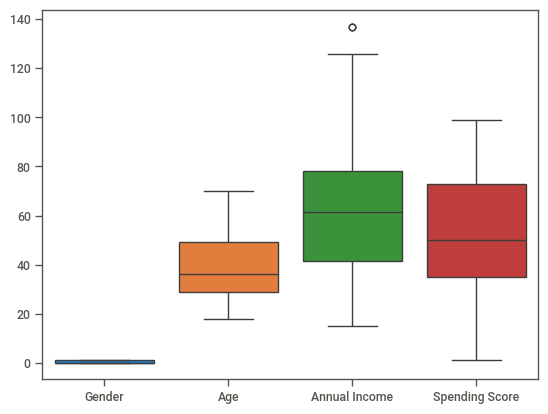

In [130]:
sns.boxplot(X.iloc[:,:]) ## without outliers

In [131]:
wcss = []
def find_wcss(epoch , df ,randomState=42):
  for i in range(1,epoch):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=randomState)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1,epoch), wcss)
  plt.title('The Elbow Point Graph')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.show()


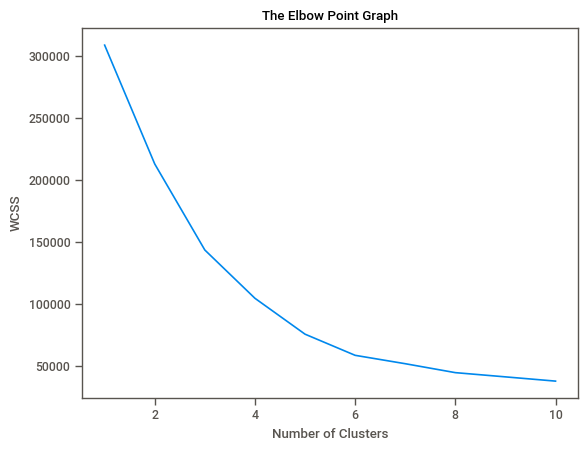

In [132]:
find_wcss(epoch = 11,df=X) ## Best Number of Clusters = 5

In [133]:
## Optimum Model
model = KMeans(n_clusters= 5, init='k-means++', random_state=42)

In [134]:
y = model.fit_predict(X)

In [135]:
print(y)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [136]:
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, y, metric="sqeuclidean")
)

Silhouette Coefficient: 0.631


In [138]:
X['cluster'] = y

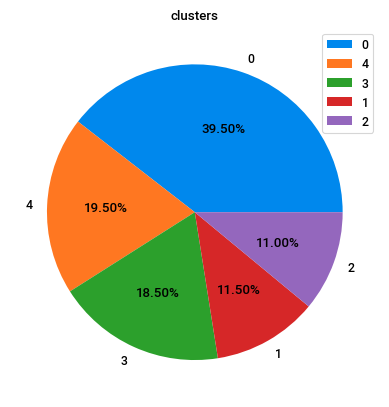

In [141]:
plt.pie(x = X['cluster'].value_counts(), labels = X['cluster'].unique(), autopct = '%1.2f%%');plt.title('clusters')
plt.legend()